In [1]:
# 딥러닝 학습용 데이터베이스
# imageNet
# MSCoCo
# CIFAR - 10

#CNN 인식

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# 데이터 확보
(x_train,y_train),(x_test,y_test)= cifar10.load_data()
x_train = x_train.astype(np.float32)/255.0
x_test = x_test.astype(np.float32)/255.0

y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

170508288/170498071 [==============================] - 15s 0us/step


In [4]:
x_train.shape

(50000, 32, 32, 3)

In [5]:
# 신경망 설계  ccp d ccp d f fc d fc
cnn = Sequential()
cnn.add(Conv2D(32,(3,3),activation='relu',input_shape = (32, 32, 3)  ))
cnn.add(Conv2D(32,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Conv2D(64,(3,3),activation='relu' ))
cnn.add(Conv2D(64,(3,3),activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2,2)))
cnn.add(Dropout(0.25))

cnn.add(Flatten())
cnn.add(Dense(512,activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(10,activation='softmax'))

In [17]:
x_train.shape, y_train.shape ,  y_test.shape

((50000, 32, 32, 3), (50000, 10), (10000, 10))

In [ ]:
from tensorflow.python import metrics
#신경망 모델 학습
cnn.compile(loss = tf.keras.losses.categorical_crossentropy, optimizer=Adam(),metrics=['accuracy'])
hist = cnn.fit(x_train,y_train,batch_size=128,epochs=30,validation_data=(x_test,y_test),verbose=2)

In [7]:
#신경망 모델 정확률 평가
res = cnn.evaluate(x_test,y_test,verbose=2)
res

313/313 - 1s - loss: 0.6646 - accuracy: 0.7849 - 936ms/epoch - 3ms/step


[0.664574146270752, 0.7849000096321106]

In [21]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

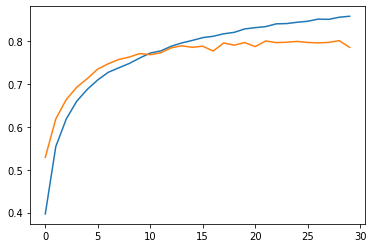

In [22]:
#시각화
sns.lineplot(data= hist.history['accuracy'])
sns.lineplot(data= hist.history['val_accuracy'])

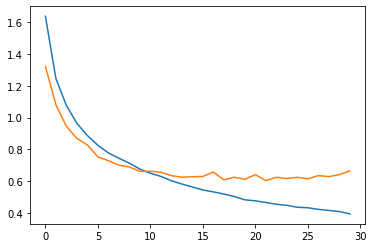

In [23]:
sns.lineplot(data= hist.history['loss'])
sns.lineplot(data= hist.history['val_loss'])

In [24]:
# 학습된 모델을 저장하고 재 활용
# 학습에 시간이 많이 걸리기때문에 저장해 두고 필요할때 불러쓴다.
# save 함수로 구현(신경망의 구조정보와. 가중치 정보를 저장해 HDF5 파일 형식 )

In [26]:
cnn.save('cnn1.h5')